# UNI-VARIANT LOGISTIC REGRESSION

**Reading diabetes dataset**

In [121]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima = pima.iloc[1:] #added this because of the error ValueError: could not convert string to float: 'Pregnancies'

In [122]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,NaN,137,40,35,168,43.1,2.288,NaN,1


In [123]:
pima=pima.dropna()

<AxesSubplot:xlabel='glucose', ylabel='label'>

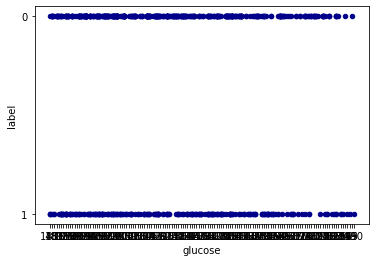

In [124]:
pima.plot.scatter(x=col_names[1],y=col_names[8],c='DarkBlue')

Pre-processing (reshaping)

In [125]:
#split dataset in features and target variable
X = pima.glucose.values.reshape(-1, 1) # Features
y = pima.label.values.reshape(-1, 1) # Target variable
print(pima.dropna)

<bound method DataFrame.dropna of     pregnant glucose  bp skin insulin   bmi pedigree age label
1          6     148  72   35       0  33.6    0.627  50     1
2          1      85  66   29       0  26.6    0.351  31     0
3          8     183  64    0       0  23.3    0.672  32     1
4          1      89  66   23      94  28.1    0.167  21     0
7          3      78  50   32      88    31    0.248  26     1
..       ...     ...  ..  ...     ...   ...      ...  ..   ...
762        9     170  74   31       0    44    0.403  43     1
763        9      89  62    0       0  22.5    0.142  33     0
764       10     101  76   48     180  32.9    0.171  63     0
766        5     121  72   23     112  26.2    0.245  30     0
767        1     126  60    0       0  30.1    0.349  47     1

[743 rows x 9 columns]>


**Splitting the dataset**

In [126]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [127]:
# import the class
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=42, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
reg = LogisticRegression()
reg.fit(x_train, y_train)

(543, 1)
(200, 1)
(543, 1)
(200, 1)


C:\Users\Ankush\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Prediction**

In [128]:
y_pred=reg.predict(x_test)

In [129]:
new=reg.predict([[150.0]])
print(new)

['1']


**Confusion Matrix**

In [130]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[122,   8],
       [ 34,  36]], dtype=int64)

In [131]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

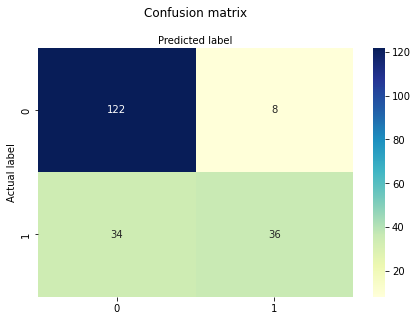

In [132]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Precision**

In [133]:
print("\n Precision is", metrics.precision_score(y_test, y_pred, pos_label='1'))


 Precision is 0.8181818181818182


**Recall**

In [134]:
print("\n Recall is", metrics.recall_score(y_test, y_pred, pos_label='1'))


 Recall is 0.5142857142857142


**Errors**

In [135]:
from sklearn.metrics import mean_absolute_error,  mean_squared_error
predictions = reg.predict(x_test)
mae = mean_absolute_error(y_test,predictions)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  0.21


In [136]:
predictions = reg.predict(x_test)
mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error = ",mse)

Mean Squared Error =  0.21


In [137]:
# compute the RMSE of our predictions
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  0.458257569495584


**ROC and AUC**

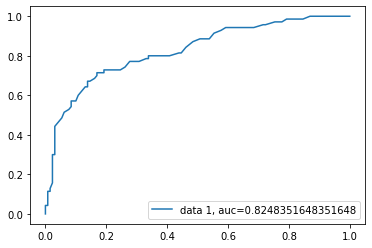

In [138]:
y_pred_proba = reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='1')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Accuracy**

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.79

# INFERENCE

With an AUC (Area under the curve) of 0.778, a fair classification has been made.

The Mean Absolute Error and Mean Squared Error of 0.275 represents an acceptable model.

**COMPARISION**

In uni-variant only insulin was considered as a feature which affects the target output of being diabetic or not. Whereas in multi-variant various features were considered. 

In multi-variant there are 95 true positives whereas in uni-variant there are 113.

The accuracy rate in both are similar with 72 percentage

The precision in multi-variant is 0.616 and in uni-variant it's a similar value of 0.653.